## Visulaizing how each layer of convolution work for FASHION MNIST DATA SET

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

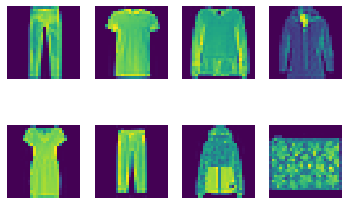

In [6]:
import matplotlib.image as mpimg
nrows,ncols = 2,4
#pic_ind = 0
fig = plt.gcf()
#fig.set_size_inches(nrows,ncols)
pic_ind += 8
for i,x in enumerate(x_train[pic_ind:pic_ind+8,:,:]):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    plt.imshow(x)
plt.show()

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 ,activation = 'relu'),
    tf.keras.layers.Dense(10 ,activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()
history = model.fit(x_train, y_train, epochs=8)
test_loss = model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.4092 - accuracy: 0.8505
Epoch 2/8
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2707 - accuracy: 0.9005
Epoch 3/8
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2232 - accuracy: 0.9158
Epoch 4/8
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1885 - accuracy: 0.9283
Epoch 5/8
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1593 - accuracy: 0.9400
Epoch 6/8
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1344 - accuracy: 0.9490
Epoch 7/8
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.1123 - accuracy: 0.9565
Epoch 8/8
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0915 - accuracy: 0.9647
10000/1 [========================================================================================================================

In [17]:
test_loss

[0.3282069441482425, 0.9098]

In [20]:
model.predict(x_test[0].reshape(1,28,28,1)) 

array([[6.3107332e-13, 1.8538566e-14, 9.1633373e-14, 2.6560741e-14,
        1.4377316e-17, 1.8535572e-09, 8.8292793e-16, 9.0939452e-12,
        4.4175792e-15, 1.0000000e+00]], dtype=float32)

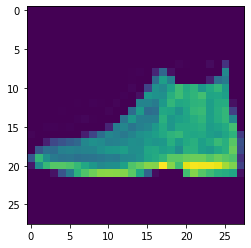

In [22]:
plt.imshow(x_test[0].reshape(28,28))

### Looking at output layer wise

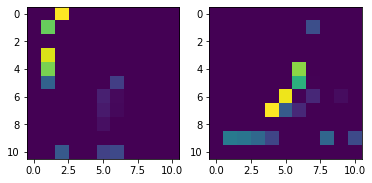

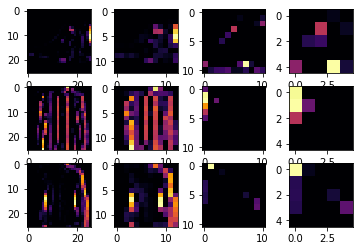

In [41]:
import matplotlib.pyplot as plt

# f, axarr = plt.subplots(3,4)# defining that we have 3 rows and 4 columns of plots
FIRST_IMAGE=0                # image number 1 accessing Basically just image number index 
SECOND_IMAGE=7               # image number 2 like first one 
THIRD_IMAGE=26               # image number 3 like first one 
CONVOLUTION_NUMBER = 63      # this is juct the filter number of the 64 filters we used here we are using 2nd filter .
                             # Since we defined our convolution to have 64 values we can take only 0-63 as valid values 

from tensorflow.keras import models
# taking the layers formed after training into an array as : 

# creating a list of layers we used in the CNN 
layer_outputs = [layer.output for layer in model.layers] # taking all layer sequentially 
#print(layer_outputs) # prints each layer used i.e. there reference address Specifying general trivia about the layer

# taking the layer to form the model for direct usage by forming model as : ** this is the model we can test on !!
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) # taking standard input and
                                                                                        # all the layers as outputs 
## ************** to access any layer i.e. Convolution and Pooling here we need to :
#                       activation_model.predict(train_image.reshape(1,28,28,1))[layer_number_whose_output_we_want]
               #* since the layers were taken as a list we can access a layer using [] index and get that layers output !         

## Example : 
v = (activation_model.predict(x_test[0:2].reshape(2,28,28,1))[2]) # notice that we get the output image with this as  well
#print(v.shape)                                             # this [] is for the layers output we want!!
sp = plt.subplot(1,2,1)
plt.imshow(v[1,:,:,127]) # the last index access the Convolution number to be used i.e. the filter we want to apply available 
                       # in convolution applied. The first index is the image we want to see ! like here we are accesing 
                       #2 images 
sp = plt.subplot(1,2,2)
plt.imshow(v[0,:,:,127])
plt.show()
      
f, axarr = plt.subplots(3,4)
# inferno map is printed in each case to observe the filters !
for x in range(0,4):
    # in each fi the [x] after denotes that this is the xth layer neural network and we want to access that layers output  
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x] ## * f1 is the 1st row part of 3x4 subplots
    # again as before to feed to neural network we need to provide 4D data if we didn't reshape we would be giving 3D .
    # f1 now contains the first image !
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')  # same plotting as before
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x] # * f2 is the 2nd row part
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x] # * f3 is the 3rd row part
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False) 
    # and thus after each iteration x changes to give deeper insight in how the output of a layer changed!

### Looking at output of different Convolutional Filters

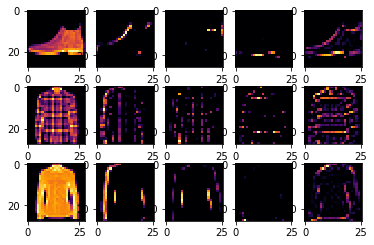

In [43]:
# This code shows how different filters affect the image : 
fi, axar = plt.subplots(3,5)
axar[0,0].imshow(x_test[FIRST_IMAGE][:,:,0], cmap='inferno') # printing the first images to later compare to plots of layers
axar[0,0].grid(False)
axar[1,0].imshow(x_test[SECOND_IMAGE][:,:,0], cmap='inferno')
axar[1,0].grid(False)
axar[2,0].imshow(x_test[THIRD_IMAGE][:,:,0], cmap='inferno')
axar[2,0].grid(False)

x = 0 # corresponds to first convolution
i = 0
for CONVOLUTION_NUMBER in [3, 34, 36, 54]: # convolution number to work on i.e. Filter
    fi1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axar[0,i+1].imshow(fi1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axar[0,i+1].grid(False)
    fi2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axar[1,i+1].imshow(fi2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axar[1,i+1].grid(False)
    fi3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axar[2,i+1].imshow(fi3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axar[2,i+1].grid(False)
    i += 1
    #x += 1 we are not incrementing it because we don't want go see layer outputs but the filter efefct here of the first layer
    #       for different filter!

### Visualizing intermediate representations : 

C:\Users\shaur\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


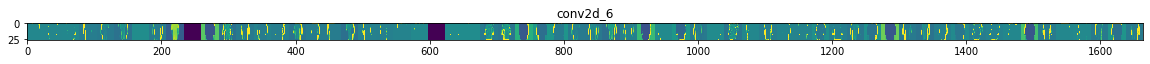

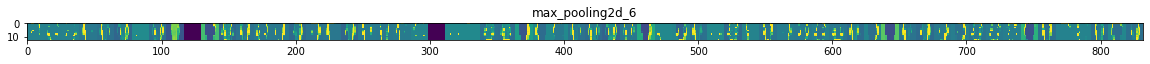

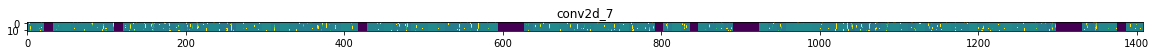

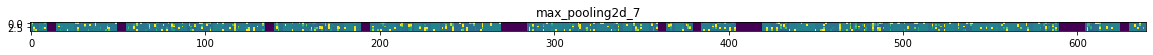

In [56]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's take a random input image from the training set.
x = x_train[25,:,:,:].reshape(1,28,28,1)

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map i.e. total filters
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features)) # our image visualization grid
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64                  # adjusting sharpness
            x += 128                 # adjusting lighting
            x = np.clip(x, 0, 255).astype('uint8') # for values less than 0 take 0 and greater than 255 take 255 
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## So we can see how for each convolution we get different detections like intially it seems to detect edges of different objects and as we move deeper it is able to learn the parts of objects by covering the major highlight of image for easy learning.